In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [298]:
cnty_pops = pd.read_csv('WPP2019_TotalPopulationBySex.csv')[['Location', 'Variant', 'Time','PopTotal']].set_index('Variant')
cnty_pops = cnty_pops[cnty_pops['Time']==2050]
cnty_pops['PopTotal'] = cnty_pops['PopTotal'].apply(lambda x: x * 1000)

In [299]:
all_countries = [
    
    'Argentina', 'Australia', 'Bulgaria',
    'Belize', 'Brazil', 'Canada', 'Denmark',
    'France', 'Hungary', 'Kazakhstan',
    'Lithuania', 'Latvia', 'Paraguay',
    'Ukraine', 'Uruguay', 'United States of America',
    'Belarus', 'Botswana', 'Estonia',
    'Finland', 'Georgia', 'Iran', 'Libya',
    'Lesotho', 'Moldova', 'Mongolia',
    'Norway', 'New Zealand', 'Poland',
    'Portugal', 'Russia', 'Swaziland',
    'Tunisia',
    'United Arab Emirates', 'Belgium',
    'Brunei', 'Cyprus', 'Djibouti', 'Algeria',
    'Gambia', 'Iraq', 'Israel', 'Jordan',
    'Japan', 'South Korea', 'Kuwait',
    'Lebanon', 'Montenegro',
    'Mauritania', 'Netherlands', 'Saudi Arabia', 'Singapore', 'Trinidad and Tobago', 'Yemen',
    'Afghanistan', 'Angola', 'Burundi',
    'Bangladesh', 'Cameroon',
    'Democratic Republic of the Congo',
    'Republic of Congo', 'Dominican Republic', 'Egypt', 'Eritrea', 'Ethiopia',
    'Ghana', 'Guinea Bissau',
    'Guatemala', 'Haiti', 'India', 'Jamaica',
    'Kenya', 'Sri Lanka', 'Madagascar',
    'Mozambique', 'Malawi', 'Niger',
    'Nigeria', 'Nepal', 'Oman', 'Pakistan',
    'Philippines', 'Puerto Rico', 'North Korea', 'Rwanda', 'El Salvador',
    'Syria', 'Togo', 'Uganda',
    'Benin', 'Burkina Faso', 'Bolivia',
    'China', 'Ivory Coast', 'Colombia',
    'Costa Rica', 'United Kingdom',
    'Guinea', 'Honduras', 'Indonesia',
    'Ireland', 'Luxembourg', 'Mexico',
    'Malaysia', 'Panama', 'Sudan',
    'Senegal', 'Sierra Leone', 'Tajikistan',
    'Tanzania', 'Uzbekistan', 'Vietnam',
    'Zambia', 'Gabon', 'Equatorial Guinea',
    'Morocco', 'Peru',
    'Albania', 'Austria', 'Azerbaijan',
    'Bosnia and Herzegovina', 'Chile',
    'Czech Republic', 'Germany', 'Spain',
    'Greece', 'Croatia', 'Italy',
    'Kyrgyzstan', 'Laos', 'Macedonia',
    'Mali', 'Nicaragua', 'Papua New Guinea', 'Romania', 'Somalia',
    'Serbia', 'Slovakia', 'Slovenia',
    'Chad', 'Thailand', 'Turkmenistan',
    'East Timor', 'Turkey', 'Venezuela',
    'Armenia', 'Bhutan', 'Central African Republic', 'Switzerland', 'Cuba',
    'Ecuador', 'Guyana', 'Cambodia',
    'Liberia', 'Myanmar', 'Namibia',
    'Suriname', 'Sweden', 'South Africa',
    'Zimbabwe'
]

countries_names = pd.read_csv('country_names.csv',encoding='latin-1').rename({'Country Code': 'ISO3'}, axis=1)
countries_names = countries_names.iloc[[e in all_countries for e in list(countries_names['name'].values)], :]
countries_names.loc[countries_names['nev_admin_name']=='Iran', 'fao_producer_prices_name'] = 'Iran (Islamic Republic of)'
countries_names.loc[countries_names['nev_admin_name']=='Swaziland', 'fao_producer_prices_name'] = 'Eswatini'
countries_names.loc[countries_names['nev_admin_name']=='Republic of Congo', 'fao_producer_prices_name'] = 'Congo'
countries_names.loc[countries_names['nev_admin_name']=="North Korea", 'fao_producer_prices_name'] = "Dem. People's Republic of Korea"
countries_names.loc[countries_names['nev_admin_name']=="Syria", 'fao_producer_prices_name'] = "Syrian Arab Republic"
countries_names.loc[countries_names['nev_admin_name']=="Ivory Coast", 'fao_producer_prices_name'] = "Cote d'Ivoire"
countries_names.loc[countries_names['nev_admin_name']=="Czech Republic", 'fao_producer_prices_name'] = "Czechia"
countries_names.loc[countries_names['nev_admin_name']=="Macedonia", 'fao_producer_prices_name'] = "North Macedonia"
countries_names.loc[countries_names['nev_admin_name']=="East Timor", 'fao_producer_prices_name'] = "Timor-Leste"

countries_names.head()

,id,ISO3,adm0_a3,name,nev_admin_name,fao_producer_prices_name,nev_name,nev_name_long,sovereignt,base_id,...,iana_internet,un_vehicle,ioc_olympic,un_iso_numeric,itu_calling,UNI,UNDP,FAOSTAT,GAU,FAOSTAT_augmented
1,2,AFG,AFG,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,1,...,.af,AFG,AFG,4.0,93,4.0,AFG,2.0,1.0,2
2,3,AGO,AGO,Angola,Angola,Angola,Angola,Angola,Angola,2,...,.ao,NaN,ANG,24.0,244,24.0,ANG,7.0,8.0,7
4,5,ALB,ALB,Albania,Albania,Albania,Albania,Albania,Albania,4,...,.al,AL,ALB,8.0,355,8.0,ALB,3.0,3.0,3
7,8,ARE,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,7,...,.ae,NaN,UAE,784.0,971,784.0,UAE,225.0,255.0,225
8,9,ARG,ARG,Argentina,Argentina,Argentina,Argentina,Argentina,Argentina,8,...,.ar,RA,ARG,32.0,54,32.0,ARG,9.0,12.0,9


In [300]:
variants = ['Low', 'Medium', 'High', 'Constant fertility', 'Instant replacement', 'Baseline','Zero migration', 'Constant mortality', 'No change']
values = [1.45, 1.585, 1.723, 1.716, 1.533, 1.585, 1., 1.519, 1.644, 1.485]
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']

for country in countries:
    for i, var in enumerate(variants):
        if var!='Baseline':
            try:
                print(country)
                new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                print(cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var])
                print(new_name)
            except:
                try:
                    new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                    print(cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var])
                except:
                    print(get_population(df[df.ISO3==country]) * values[i])

AFG
58806000
Afghanistan
AFG
64683000
Afghanistan
AFG
70700000
Afghanistan
AFG
88195000
Afghanistan
AFG
55631000
Afghanistan
AFG
67615000
Afghanistan
AFG
61703000
Afghanistan
AFG
83984000
Afghanistan
AGO
71514000
Angola
AGO
77420000
Angola
AGO
83477000
Angola
AGO
92284000
Angola
AGO
48959000
Angola
AGO
77456000
Angola
AGO
73296000
Angola
AGO
87257000
Angola
ALB
2213000
Albania
ALB
2424000
Albania
ALB
2645000
Albania
ALB
2488000
Albania
ALB
2750000
Albania
ALB
2776000
Albania
ALB
2320000
Albania
ALB
2383000
Albania
ARE
9434000
United Arab Emirates
ARE
10425000
United Arab Emirates
ARE
11424000
United Arab Emirates
ARE
10590000
United Arab Emirates
ARE
12052000
United Arab Emirates
ARE
10624000
United Arab Emirates
ARE
10154000
United Arab Emirates
ARE
10318000
United Arab Emirates
ARG
49970000
Argentina
ARG
54867000
Argentina
ARG
59953000
Argentina
ARG
57216000
Argentina
ARG
54905000
Argentina
ARG
54773000
Argentina
ARG
53274000
Argentina
ARG
55606000
Argentina
ARM
2573000
Armenia
ARM
2

1240000
Estonia
EST
1198000
Estonia
EST
1100000
Estonia
EST
1078000
Estonia
ETH
187299000
Ethiopia
ETH
205411000
Ethiopia
ETH
224003000
Ethiopia
ETH
258972000
Ethiopia
ETH
168740000
Ethiopia
ETH
205881000
Ethiopia
ETH
195496000
Ethiopia
ETH
246190000
Ethiopia
FIN
5054000
Finland
FIN
5486000
Finland
FIN
5927000
Finland
FIN
5515000
Finland
FIN
6057000
Finland
FIN
4974000
Finland
FIN
5267000
Finland
FIN
5296000
Finland
FRA
62382000
France
FRA
67587000
France
FRA
72880000
France
FRA
67747000
France
FRA
70277000
France
FRA
65121000
France
FRA
65249000
France
FRA
65409000
France
GAB
3494000
Gabon
GAB
3809000
Gabon
GAB
4132000
Gabon
GAB
4407000
Gabon
GAB
3080000
Gabon
GAB
3771000
Gabon
GAB
3693000
Gabon
GAB
4272000
Gabon
GBR
68291000
United Kingdom
GBR
74082000
United Kingdom
GBR
79983000
United Kingdom
GBR
73900000
United Kingdom
GBR
78194000
United Kingdom
GBR
67675000
United Kingdom
GBR
71400000
United Kingdom
GBR
71219000
United Kingdom
GEO
3207000
Georgia
GEO
3517000
Georgia
GEO
3837000


North Macedonia
1775000
MKD
North Macedonia
1776000
MLI
40196000
Mali
MLI
43586000
Mali
MLI
47067000
Mali
MLI
55928000
Mali
MLI
28617000
Mali
MLI
45318000
Mali
MLI
40934000
Mali
MLI
52324000
Mali
MMR
56207000
Myanmar
MMR
62253000
Myanmar
MMR
68490000
Myanmar
MMR
65837000
Myanmar
MMR
65110000
Myanmar
MMR
63120000
Myanmar
MMR
60117000
Myanmar
MMR
63592000
Myanmar
MNE
540000
Montenegro
MNE
589000
Montenegro
MNE
639000
Montenegro
MNE
592000
Montenegro
MNE
629000
Montenegro
MNE
608000
Montenegro
MNE
563000
Montenegro
MNE
565000
Montenegro
MNG
4051000
Mongolia
MNG
4449000
Mongolia
MNG
4858000
Mongolia
MNG
4883000
Mongolia
MNG
4107000
Mongolia
MNG
4484000
Mongolia
MNG
4290000
Mongolia
MNG
4717000
Mongolia
MOZ
59746000
Mozambique
MOZ
65313000
Mozambique
MOZ
71051000
Mozambique
MOZ
80049000
Mozambique
MOZ
45899000
Mozambique
MOZ
65491000
Mozambique
MOZ
61004000
Mozambique
MOZ
74741000
Mozambique
MRT
8337000
Mauritania
MRT
9025000
Mauritania
MRT
9727000
Mauritania
MRT
10321000
Mauritania
MRT
669

36712000
Chad
TCD
43199000
Chad
TCD
23473000
Chad
TCD
34098000
Chad
TCD
31953000
Chad
TCD
40446000
Chad
TGO
14098000
Togo
TGO
15416000
Togo
TGO
16774000
Togo
TGO
18034000
Togo
TGO
11680000
Togo
TGO
15502000
Togo
TGO
14604000
Togo
TGO
17062000
Togo
THA
60483000
Thailand
THA
65940000
Thailand
THA
71648000
Thailand
THA
67021000
Thailand
THA
74625000
Thailand
THA
65264000
Thailand
THA
62719000
Thailand
THA
63791000
Thailand
TJK
14670000
Tajikistan
TJK
16208000
Tajikistan
TJK
17818000
Tajikistan
TJK
18377000
Tajikistan
TJK
13001000
Tajikistan
TJK
17045000
Tajikistan
TJK
15776000
Tajikistan
TJK
17896000
Tajikistan
TKM
7217000
Turkmenistan
TKM
7949000
Turkmenistan
TKM
8703000
Turkmenistan
TKM
8692000
Turkmenistan
TKM
7567000
Turkmenistan
TKM
8114000
Turkmenistan
TKM
7775000
Turkmenistan
TKM
8501000
Turkmenistan
TLS
Timor-Leste
1837000
TLS
Timor-Leste
2019000
TLS
Timor-Leste
2205000
TLS
Timor-Leste
2543000
TLS
Timor-Leste
1711000
TLS
Timor-Leste
2229000
TLS
Timor-Leste
1965000
TLS
Timor-Leste


In [301]:
# importing requirements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [302]:
# !pip3 install geopandas
import geopandas as gpd
import_indep = gpd.read_file('shp_trade_dep.gpkg')
imports_data = import_indep[['cntry', 'admin','country','yr2013']]
imports_data.head()

,cntry,admin,country,yr2013
0,None,Saint Barthelemy,None,NaN
1,None,Jersey,None,NaN
2,None,Ashmore and Cartier Islands,None,NaN
3,None,Siachen Glacier,None,NaN
4,None,Indian Ocean Territories,None,NaN


In [303]:
# merge import with country_names to add ISO3 columns

imports = imports_data.merge(countries_names[['ISO3', 'name']], left_on='admin', right_on='name', how='right')
imports.head()

,cntry,admin,country,yr2013,ISO3,name
0,Armenia,Armenia,Armenia,0.124763,ARM,Armenia
1,Australia,Australia,Australia,1.000000,AUS,Australia
2,India,India,India,0.493093,IND,India
3,Indonesia,Indonesia,Indonesia,0.806717,IDN,Indonesia
4,Iran (Islamic Republic of),Iran,Iran (Islamic Republic of),0.209009,IRN,Iran


In [304]:
data_path = 'outputs/compare/'
df = pd.read_csv(data_path+'ssp1_compare_new.csv')
df.head()

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
0,330087,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
1,330088,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
2,330089,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
3,330090,0.0,NaN,NaN,NaN,NaN,NaN,949.302979,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark
4,334378,0.0,NaN,NaN,NaN,NaN,NaN,961.741882,0.0,0.0,NaN,NaN,NaN,NaN,91.0,91,GRL,Greenland,Denmark


In [305]:
diet_2000 = pd.read_csv('Consumption_2000_FAOSTAT.csv')
LS_2000_df = diet_2000[diet_2000['Item']=='Animal Products'][['Country','Value']].merge(countries_names[['name','ISO3']].drop_duplicates(), right_on='name',left_on='Country',how='left')
# kcal/capita/day to cal/capita
LS_2000_df['LS2000_percapita'] = LS_2000_df['Value'].apply(lambda x:x*1e3*365.25)
LS_2000_df.head()

,Country,Value,name,ISO3,LS2000_percapita
0,Afghanistan,275,Afghanistan,AFG,100443750.0
1,Albania,674,Albania,ALB,246178500.0
2,Algeria,277,Algeria,DZA,101174250.0
3,Angola,153,Angola,AGO,55883250.0
4,Antigua and Barbuda,701,NaN,NaN,256040250.0


In [306]:
# function that returns the population from a dataframe by year
def get_population(X, year=2050):
    return int(X['population_'+str(year)].sum())

# function that returns the total production from a dataframe by year
def get_production(X, year=2050):
    return X['calories_'+str(year)].sum()

# function that calculates the caloric sufficiency. it is fed by a dataframe [to preserve generality]
def cal_suff(X, cntry=None, year=2050, food_waste=.19, diet=.19, feed_food_factor=2.3, population = None, pop_fact=1., ADER=2320*1e3*365.25):
    
    
    conso = 1-food_waste
    ratio = 1 + .52/.29
    perc_feed = conso / ratio
    perc_food = perc_feed * (ratio-1)
    
    prod = get_production(X, year=year)
    food = perc_food * prod
    feed_now_food = 0.
    if cntry in LS_2000_df.ISO3.unique():
        LS = LS_2000_df[LS_2000_df.ISO3==cntry]['LS2000_percapita'].values[0] * get_population(X, year=2000)
        
    else:
        LS = (1.1483e15*1e3)  * get_population(X, year=2000) / 5976296907.
    if year==2050:
        LS_2000 = LS
        LS = diet * (food + feed_food_factor * LS_2000) / (1 + diet * (feed_food_factor - 1))
        feed_now_food = feed_food_factor * (LS_2000 - LS)
    
    production = food + LS + feed_now_food
    if population:
        demand = population * ADER
    else:
        demand = get_population(X, year=year) * pop_fact * ADER
    
    return production/demand

cal_suff(df[df.ISO3=='USA'], cntry='USA', year=2050)

3.9091551347024596

In [307]:
def custom_categorization_new(row):
    
    if row['calSuff2000'] > 3 and row['trade'] > 0.8: 
        return 'Exporters' # e.g Brazil, USA, France, Denmark (Greenland)
    
    elif (row['delta_CalSuff_avg'] > 0.6 and row['delta_consistency'] >= 3) or (row['calSuff2000'] > 1.2 and row['delta_consistency'] >= 3 and row['delta_CalSuff_avg'] > 0.2):
        return 'Increasing sufficiency'
    
    elif row['trade'] < 0.1:
        return 'Importers'
    
    elif row['calSuff2000'] < 1.2 and (row['delta_consistency'] <= 1 or row['highest_ssp'] < 0.9):
        return 'Most vulnerable'
    
    elif (row['lowest_ssp'] < 1 or row['calSuff2000'] < 2) and row['delta_CalSuff_avg'] < -0.2 and row['delta_consistency'] <= 1:
        return 'Newly vulnerable'
    
    elif row['calSuff2000'] < 1.2 and row['delta_consistency'] >= 2 and row['lowest_ssp'] > 0.9*row['calSuff2000']:
        return 'Vulnerable but improving'
    
    elif row['delta_consistency'] <= 2 and row['delta_CalSuff_avg'] < -0.1 and row['calSuff2000'] > 2:
        return 'Decreasing but not as vulnerable'
    
    elif row['delta_consistency'] > 0 and row['delta_consistency'] < 4:
        return 'Highly variable'  
    
    return 'Outliers'

In [441]:
header = [
    'Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
            'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

variants = ['Low', 'Momentum', 'Constant mortality', 'Instant replacement', 'Baseline', 'Medium', 'Zero migration', 'No change', 'Constant fertility', 'High']

ssps = [
    ['ssp1', 'ssp4'],
    ['ssp2'],
    ['ssp2'],
    ['ssp2'],
    ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'],
    ['ssp2'],
    ['ssp3'],
    ['ssp1', 'ssp2', 'ssp4'],
    ['ssp2', 'ssp3', 'ssp4'],
    ['ssp3', 'ssp4']
]

values = [1.45, 1.519, 1.533, 1., 1.585, 1.585, 1.644, 1.716, 1.723]
diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
suffices = []
all_counts = []
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050', '2000']].set_index('Scenario')


cat1 = []
cat2 = []
cat3 = []
cat4 = []
cat5 = []
cat6 = []
cat7 = []
cat8 = []
cat9 = []

pivot_cols = ['value', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Highly variable',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Highly variable',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Highly variable',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Highly variable',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Highly variable',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving']
stacked_df = pd.DataFrame(columns=pivot_cols)
countries = pd.read_csv('outputs/sufficiency/country_sufficiencies_new.csv')['ISO3']


for var in list(variants):

    suffies = pd.DataFrame(columns=['ISO3', 'calSuff2000', 'ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5'])
    suffies['ISO3'] = countries
    
    for country in list(countries):
        my_diet = cnty_diets[cnty_diets['Region']==country]['2000'].mean()
        suffies.loc[suffies.ISO3==country, 'calSuff2000'] = cal_suff(df[df.ISO3==country], cntry=country, year=2000)
    suffies['calSuff2000'] = suffies.calSuff2000.astype('float')

    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        for country in list(countries):
            try:
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
            except:
                my_diet = diets[i]
            
            if var!='Baseline':
                try:
                    new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                    pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                except:
                    try:
                        new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                        pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                    except:
                        pop = get_population(df[df.ISO3==country]) * values[i]
                suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet, population=pop)
                
            else:
                suffies.loc[suffies.ISO3==country, 'ssp'+str(i+1)] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                  year=2050, diet=my_diet)

        suffies['ssp'+str(i+1)] = suffies['ssp'+str(i+1)].astype('float')

    suffies['delta_consistency'] = -1
    for i, country in suffies.iterrows():
        state = -1
        val_2000 = country['calSuff2000']   
        down = 0
        up = 0
        num_nan = 0
        for ssp in ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']:
            if (country[ssp] == np.nan) or (val_2000 == np.nan):
                num_nan += 1
            # not significant if not change of 0.1 unit of sufficiency
            # 2050 pred less than 2000 sufficiency
            elif country[ssp] - val_2000 < -0.1:
                down += 1
            # 2050 pred more than 2000 sufficinecy
            elif country[ssp] - val_2000 >= 0.1:
                up += 1

        # Compare diff values
        # Case 
        if up == 5 - num_nan: state = 4     #4: up all scenarios
        elif down == 5 - num_nan: state = 0    #0: down all scenarios
        elif up == 4 - num_nan: state = 3     #3: up most
        elif down == 4 - num_nan: state = 1    #1: down most
        else: state = 2     #2: variable (Pink)

        suffies.at[i, 'delta_consistency'] = state
    
    suffies = suffies.merge(imports, on='ISO3').drop(['admin', 'country', 'cntry'], axis=1)
    suffies = suffies.rename({'yr2013': 'trade'}, axis=1)
    suffies.dropna(subset=['trade','ssp1','ssp2','ssp3','ssp4','ssp5'])  

    
    # Singapore
    suffies.loc[suffies[suffies['ISO3'] == 'SGP'].index, 'trade'] = 0.05

    
    suffies['avg_new_suff'] = (suffies['ssp1']
                                      +suffies['ssp2']
                                      +suffies['ssp3']
                                      +suffies['ssp4']
                                      +suffies['ssp5'])/5

    suffies['delta_CalSuff_avg'] = suffies['avg_new_suff'] - suffies['calSuff2000']

    suffies['delta_max'] = np.nan
    for i, row in suffies.iterrows():
        # (signed change, absolute change)
        changes = list([(row['ssp1'] - row['calSuff2000'], abs(row['ssp1'] - row['calSuff2000'])),
                        (row['ssp2'] - row['calSuff2000'], abs(row['ssp2'] - row['calSuff2000'])),
                        (row['ssp3'] - row['calSuff2000'], abs(row['ssp3'] - row['calSuff2000'])),
                        (row['ssp4'] - row['calSuff2000'], abs(row['ssp4'] - row['calSuff2000'])),
                        (row['ssp5'] - row['calSuff2000'], abs(row['ssp5'] - row['calSuff2000']))])
        # take signed change where absolute change is max
        suffies.loc[i, 'delta_max'] = max(changes, key=operator.itemgetter(1))[0]



    suffies['lowest_ssp'] = np.nan
    for i, row in suffies.iterrows():
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'lowest_ssp'] = min(changes)


    suffies['highest_ssp'] = np.nan
    for i, row in suffies.iterrows():    
        changes = list([row['ssp1'],
                        row['ssp2'],
                        row['ssp3'],
                        row['ssp4'],
                        row['ssp5']])
        suffies.loc[i, 'highest_ssp'] = max(changes)

    
    suffies['category'] = suffies.apply(lambda row: custom_categorization_new(row), axis=1)
    suffices.append(suffies)
    
    inters = pd.DataFrame(suffies.groupby('category')['ISO3'].apply(list))
    all_counts.append(inters)
    counts = suffies.groupby('category').count()['calSuff2000'].reset_index().rename({'calSuff2000':'count'}, axis=1)
    means = suffies.groupby('category').mean()[['ssp1','ssp2','ssp3','ssp4','ssp5']]
    suffice = pd.merge(counts, means, on='category').reset_index()
    
    
    suffice['value'] = var
    df_pivot = suffice.pivot(index='value', columns='category')
    df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns.values]
    stacked_df = pd.concat([stacked_df, df_pivot.reset_index()])
    
        
    try:
        cat1.append(suffice[suffice['category'] == 'Exporters']['count'].values[0])
    except:
        cat1.append(0)
    try:
        cat2.append(suffice[suffice['category'] == 'Increasing sufficiency']['count'].values[0])
    except:
        cat2.append(0)
    try:
        cat3.append(suffice[suffice['category'] == 'Importers']['count'].values[0])
    except:
        cat3.append(0)
    try:
        cat4.append(suffice[suffice['category'] == 'Most vulnerable']['count'].values[0])
    except:
        cat4.append(0)
    try:
        cat5.append(suffice[suffice['category'] == 'Newly vulnerable']['count'].values[0])
    except:
        cat5.append(0)
    try:
        cat6.append(suffice[suffice['category'] == 'Vulnerable but improving']['count'].values[0])
    except:
        cat6.append(0)
    try:
        cat7.append(suffice[suffice['category'] == 'Decreasing but not as vulnerable']['count'].values[0])
    except:
        cat7.append(0)
    try:
        cat8.append(suffice[suffice['category'] == 'Highly variable']['count'].values[0])
    except:
        cat8.append(0)
    try:
        cat9.append(suffice[suffice['category'] == 'Outliers']['count'].values[0])
    except:
        cat9.append(0)

In [442]:
cat1, cat2, cat3, cat4, cat5, cat6, cat7, cat8, cat9

([16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [16, 13, 14, 12, 17, 13, 12, 13, 13, 11],
 [22, 22, 22, 22, 21, 22, 22, 22, 22, 22],
 [39, 38, 39, 39, 35, 39, 39, 40, 41, 40],
 [27, 27, 28, 29, 24, 30, 31, 34, 36, 37],
 [2, 5, 3, 4, 4, 2, 1, 2, 1, 1],
 [21, 29, 25, 29, 28, 23, 23, 21, 19, 23],
 [17, 10, 13, 9, 15, 15, 16, 12, 12, 10],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

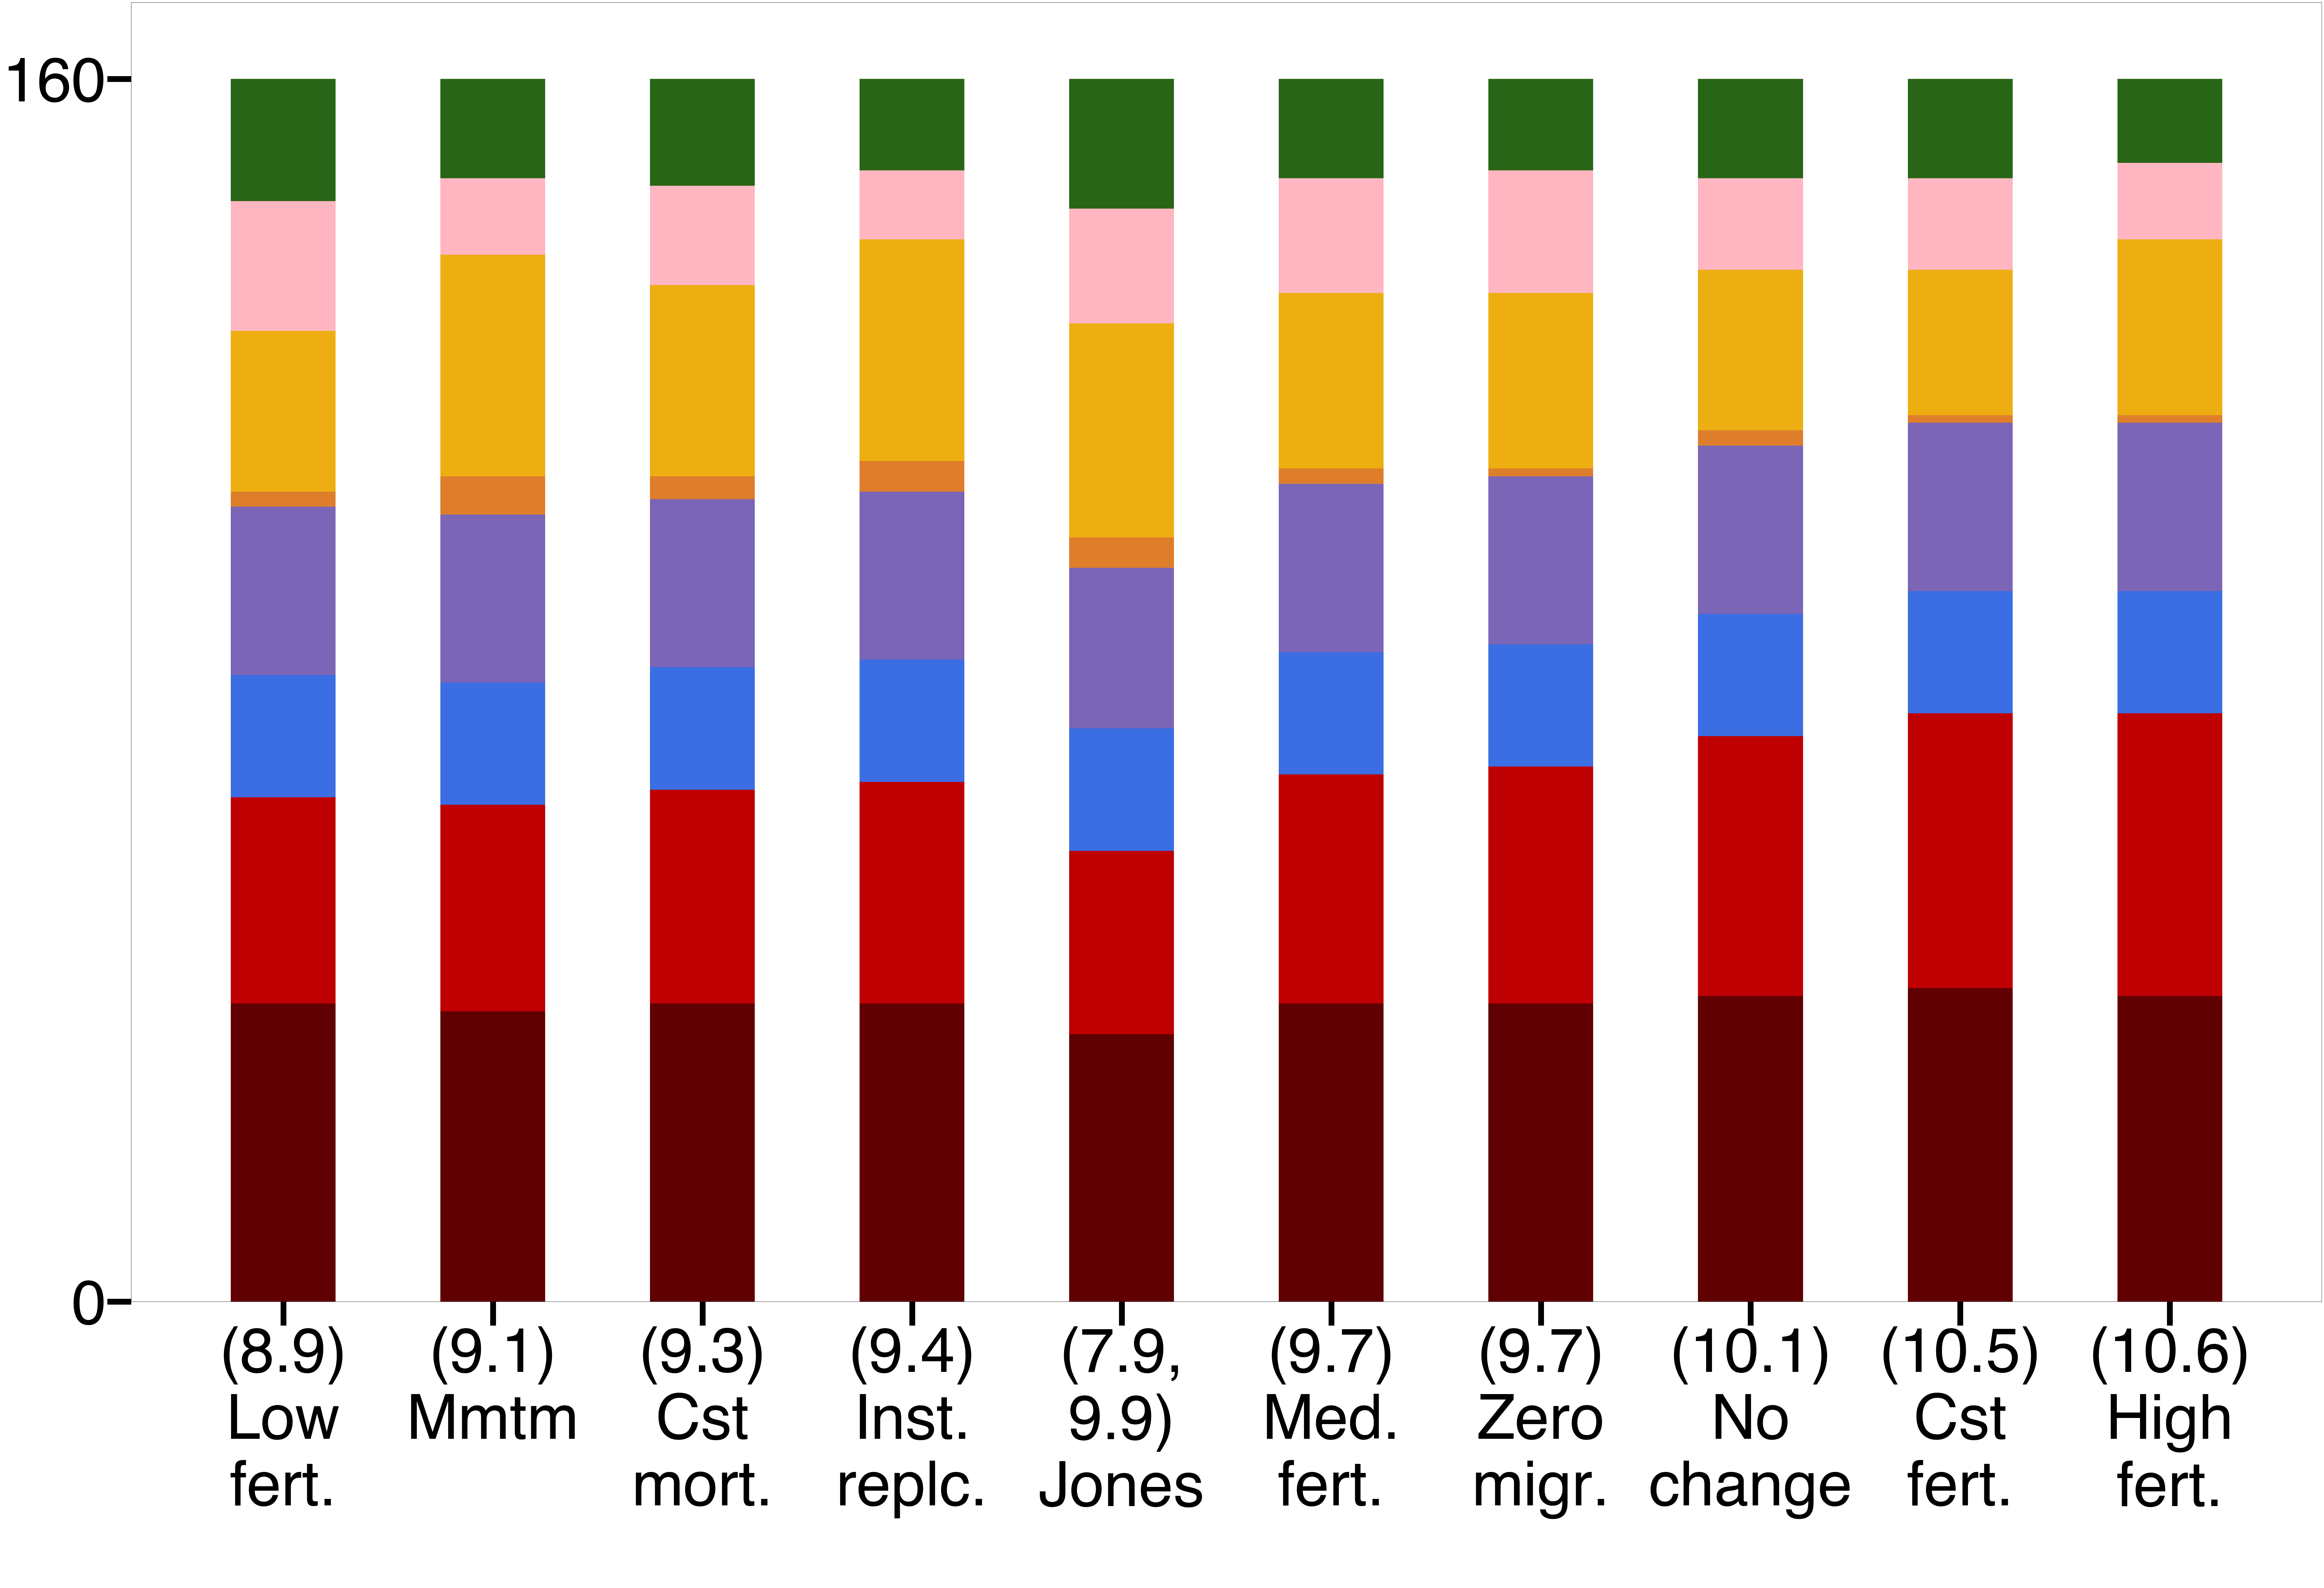

In [675]:
from matplotlib import rc
import matplotlib
# y-axis in bold
rc('font', weight='normal')
header = ['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']

rng = []
vars_disp = ['Low\nfert.', 'Mmtm', 'Cst\nmort.', 'Inst.\nreplc.', 'Jones', 'Med.\nfert.\n', 'Zero\nmigr.', 'No\nchange\n', 'Cst\nfert.', 'High\nfert.']

for var in variants:  
    if var!='Baseline':
        pop = '(%.1f)'%(cnty_pops[cnty_pops['Location']=='World']['PopTotal'][var] / 1e+09)
        rng.append(pop)
    else:
        rng.append('(7.9,\n9.9)')
values = [str(r) + '\n' + str(e) for e, r in zip(vars_disp, rng)]

cat1 = np.array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16])
cat2 = np.array([16, 13, 14, 12, 17, 13, 12, 13, 13, 11])
cat3 = np.array([22, 22, 22, 22, 21, 22, 22, 22, 22, 22])
cat4 = np.array([39, 38, 39, 39, 35, 39, 39, 40, 41, 40])
cat5 = np.array([27, 27, 28, 29, 24, 30, 31, 34, 36, 37])
cat6 = np.array([2, 5, 3, 4, 4, 2, 1, 2, 1, 1])
cat7 = np.array([21, 29, 25, 29, 28, 23, 23, 21, 19, 23])
cat8 = np.array([17, 10, 13, 9, 15, 15, 16, 12, 12, 10])
cat9 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

ind = np.arange(len(values))
width = .5
matplotlib.rc('font', serif='Helvetica Neue')
matplotlib.rc('text', usetex='false')
matplotlib.rcParams.update({'font.size': 40})

# fig = matplotlib.pyplot.gcf()
plt.figure(figsize = (115, 70))
plt.xticks(ind, values, fontsize=182)
# plt.xlabel('\n Population projection (Billions)', fontsize=70)
plt.ylim([0,170])
plt.yticks([0, 160],fontsize=182)
# plt.ylabel('Number of Countries', fontsize=70)

p1 = plt.bar(ind, cat4, width, color='#610002')
p2 = plt.bar(ind, cat5, width, bottom=cat4, color='#BE0003')
p3 = plt.bar(ind, cat1, width, bottom=cat4+cat5, color='#3B6EE2')
p4 = plt.bar(ind, cat3, width, bottom=cat4+cat5+cat1,
             color='#7B65B6')
p5 = plt.bar(ind, cat6, width, bottom=cat4+cat5+cat1+cat3, color='#DE7E2B')
p6 = plt.bar(ind, cat7, width, bottom=cat4+cat5+cat1+cat3+cat6, color='#EDAE12')
p7 = plt.bar(ind, cat8, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7, color='#FFB6C1')
p8 = plt.bar(ind, cat2, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8,
             color='#296517')
p9 = plt.bar(ind, cat9, width, bottom=cat4+cat5+cat1+cat3+cat6+cat7+cat8+cat2,
             color='grey')

ax = plt.gca()
ax.tick_params(width=17, length=70, color='black')
# plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), (header[0], header[1], header[2], header[3], header[4],\
#                                           header[5], header[6], header[7], header[8]), fontsize=24, ncol=3, framealpha=0, fancybox=True)
# plt.title('Sensitivity analysis of caloric sufficiency w.r.t. population')
plt.show()

In [440]:
l1 = all_counts[3]['ISO3']['Most vulnerable']# + all_counts[3]['ISO3']['Vulnerable but improving']
l2 = all_counts[8]['ISO3']['Most vulnerable']# + all_counts[8]['ISO3']['Vulnerable but improving']

# len(l2)/len(l1)
[i for i in l1 if i in l2]

IndexError: list index out of range

In [342]:
variants = ['Low', 'Momentum', 'Constant mortality', 'Instant replacement', 'Baseline', 'Medium', 'Zero migration', 'No change', 'Constant fertility', 'High']
values = [1.45, 1.519, 1.533, 1., 1.585, 1.585, 1.644, 1.716, 1.723]

diets = [0.23728686354880824, 0.22905550297316568, 0.20972663721021714, 0.20811659841733302, 0.21198181981961245]
cnty_diets = pd.read_csv('pctLS_SSPs_Bodirsky.csv', sep=';')[['Scenario', 'Region', '2050']].set_index('Scenario')
suffices = []
all_counts = []

pivot_cols = ['values', 'ssp1_Decreasing but not as vulnerable',
 'ssp1_Exporters',
 'ssp1_Importers',
 'ssp1_Increasing sufficiency',
 'ssp1_Most vulnerable',
 'ssp1_Newly vulnerable',
 'ssp1_Vulnerable but improving',
 'ssp2_Decreasing but not as vulnerable',
 'ssp2_Exporters',
 'ssp2_Importers',
 'ssp2_Increasing sufficiency',
 'ssp2_Most vulnerable',
 'ssp2_Newly vulnerable',
 'ssp2_Vulnerable but improving',
 'ssp3_Decreasing but not as vulnerable',
 'ssp3_Exporters',
 'ssp3_Importers',
 'ssp3_Increasing sufficiency',
 'ssp3_Most vulnerable',
 'ssp3_Newly vulnerable',
 'ssp3_Vulnerable but improving',
 'ssp4_Decreasing but not as vulnerable',
 'ssp4_Exporters',
 'ssp4_Importers',
 'ssp4_Increasing sufficiency',
 'ssp4_Most vulnerable',
 'ssp4_Newly vulnerable',
 'ssp4_Vulnerable but improving',
 'ssp5_Decreasing but not as vulnerable',
 'ssp5_Exporters',
 'ssp5_Importers',
 'ssp5_Increasing sufficiency',
 'ssp5_Most vulnerable',
 'ssp5_Newly vulnerable',
 'ssp5_Vulnerable but improving',
 'ssp1_global',
 'ssp2_global',
 'ssp3_global',
 'ssp4_global',
 'ssp5_global',
 'category'             ]

stacked_df = pd.DataFrame(columns=pivot_cols)
# stacked_df['values'] = values
stacked_df = stacked_df.set_index('values')

# countries = ['ESP', 'ARG', 'SGP', 'NOR', 'ETH', 'MEX', 'MAR']
# countries = ['ITA', 'BRA', 'JPN', 'POL', 'IND', 'CHN', 'PER']
# countries = ['DEU', 'CAN', 'DZA', 'POL', 'CMR', 'MEX', 'PER']

countries = ['ITA', 'ARG', 'SGP', 'NOR', 'IND', 'MEX', 'MAR']


for j, var in enumerate(variants):
    for i in range(5):
        data_path = 'outputs/compare/'
        df_ssp = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
        
        if var!= 'Baseline':
            #calculating global caloric sufficiency
            pop = cnty_pops[cnty_pops['Location'] == 'World']['PopTotal'][var]
            idx = pop
            stacked_df.loc[idx, 'category'] = var
            stacked_df.loc[idx, pivot_cols[36+i]] = cal_suff(df_ssp, cntry=None, year=2050, \
                                                               diet=diets[i], population=pop)
            
            
            # filling each country
            for j, country in enumerate(countries):
                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
                try:
                    new_name = countries_names[countries_names['ISO3']==country].name.values[0]
                    pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                except:
                    try:
                        new_name = countries_names[countries_names['ISO3']==country].fao_producer_prices_name.values[0]
                        pop = cnty_pops[cnty_pops['Location'] == new_name]['PopTotal'][var]
                    except:
                        pop = get_population(df_ssp[df_ssp.ISO3==country]) * values[j]
                
                
                stacked_df.loc[idx, pivot_cols[7*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                      year=2050, diet=my_diet, population=pop)
                
                
        else:
            idx = get_population(df_ssp)
            stacked_df.loc[idx, pivot_cols[36+i]] = cal_suff(df_ssp, cntry=None, year=2050, \
                                                               diet=diets[i])
            stacked_df.loc[idx, 'category'] = var+' SSP'+str(i+1)
            # filling for each country
            for j, country in enumerate(countries):

                my_diet = cnty_diets[cnty_diets['Region']==country]['2050']['ssp'+str(i+1)]
                stacked_df.loc[idx, pivot_cols[7*i + j + 1]] = cal_suff(df_ssp[df_ssp.ISO3==country], cntry=country, \
                                                                      year=2050, diet=my_diet)
        print(idx)

8906797000
8906797000
8906797000
8906797000
8906797000
9122680000
9122680000
9122680000
9122680000
9122680000
9330050000
9330050000
9330050000
9330050000
9330050000
9417980000
9417980000
9417980000
9417980000
9417980000
7949926714
8210591474
9929316985
8722972624
8248102437
9735034000
9735034000
9735034000
9735034000
9735034000
9735283000
9735283000
9735283000
9735283000
9735283000
10100631000
10100631000
10100631000
10100631000
10100631000
10543230000
10543230000
10543230000
10543230000
10543230000
10587774000
10587774000
10587774000
10587774000
10587774000


In [343]:
stacked_df

,ssp1_Decreasing but not as vulnerable,ssp1_Exporters,ssp1_Importers,ssp1_Increasing sufficiency,ssp1_Most vulnerable,ssp1_Newly vulnerable,ssp1_Vulnerable but improving,ssp2_Decreasing but not as vulnerable,ssp2_Exporters,ssp2_Importers,...,ssp5_Increasing sufficiency,ssp5_Most vulnerable,ssp5_Newly vulnerable,ssp5_Vulnerable but improving,ssp1_global,ssp2_global,ssp3_global,ssp4_global,ssp5_global,category
values,,,,,,,,,,,,,,,,,,,,,
8906797000,2.08294,4.54837,0.195727,2.03229,0.48457,1.02937,0.7208,2.10731,5.22917,0.195359,...,1.77664,0.551619,1.06167,0.553135,1.21442,1.27283,1.30034,1.30855,1.34823,Low
9122680000,1.92304,4.26092,0.197449,2.18699,0.42831,0.900227,0.65494,1.94554,4.89871,0.197078,...,1.91188,0.487574,0.928472,0.502594,1.18568,1.24271,1.26957,1.27758,1.31633,Momentum
9330050000,2.02086,4.26628,0.189835,1.93874,0.456875,0.96141,0.683053,2.0445,4.90487,0.189479,...,1.69486,0.520092,0.991574,0.524168,1.15933,1.21509,1.24135,1.24919,1.28707,Constant mortality
9417980000,1.72617,4.13955,0.161039,1.76745,0.422077,0.88734,0.657207,1.74636,4.75916,0.160737,...,1.54511,0.480478,0.91518,0.504334,1.1485,1.20375,1.22976,1.23752,1.27505,Instant replacement
7949926714,1.87398,5.57901,0.35719,1.95111,0.545802,1.23763,0.963065,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.36059,NaN,NaN,NaN,NaN,Baseline SSP1
8210591474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89534,6.40994,0.35652,...,NaN,NaN,NaN,NaN,NaN,1.38076,NaN,NaN,NaN,Baseline SSP2
9929316985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.16643,NaN,NaN,Baseline SSP3
8722972624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33612,NaN,Baseline SSP4
8248102437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.44337,0.622938,1.2731,0.739046,NaN,NaN,NaN,NaN,1.4559,Baseline SSP5


In [339]:
stacked_df

,ssp1_Decreasing but not as vulnerable,ssp1_Exporters,ssp1_Highly variable,ssp1_Importers,ssp1_Increasing sufficiency,ssp1_Most vulnerable,ssp1_Newly vulnerable,ssp1_Vulnerable but improving,ssp2_Decreasing but not as vulnerable,ssp2_Exporters,...,ssp5_Increasing sufficiency,ssp5_Most vulnerable,ssp5_Newly vulnerable,ssp5_Vulnerable but improving,ssp1_global,ssp2_global,ssp3_global,ssp4_global,ssp5_global,category
values,,,,,,,,,,,,,,,,,,,,,
8906797000,2.08294,4.54837,1.19618,0.195727,2.03229,0.48457,1.02937,0.7208,2.10731,5.22917,...,1.77664,0.551619,1.06167,0.553135,1.21442,1.27283,1.30034,1.30855,1.34823,Low
9122680000,1.92304,4.26092,1.26111,0.197449,2.18699,0.42831,0.900227,0.65494,1.94554,4.89871,...,1.91188,0.487574,0.928472,0.502594,1.18568,1.24271,1.26957,1.27758,1.31633,Momentum
9330050000,2.02086,4.26628,1.14624,0.189835,1.93874,0.456875,0.96141,0.683053,2.0445,4.90487,...,1.69486,0.520092,0.991574,0.524168,1.15933,1.21509,1.24135,1.24919,1.28707,Constant mortality
9417980000,1.72617,4.13955,1.0248,0.161039,1.76745,0.422077,0.88734,0.657207,1.74636,4.75916,...,1.54511,0.480478,0.91518,0.504334,1.1485,1.20375,1.22976,1.23752,1.27505,Instant replacement
7949926714,1.87398,5.57901,1.39288,0.35719,1.95111,0.545802,1.23763,0.963065,NaN,NaN,...,NaN,NaN,NaN,NaN,1.36059,NaN,NaN,NaN,NaN,Baseline SSP1
8210591474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89534,6.40994,...,NaN,NaN,NaN,NaN,NaN,1.38076,NaN,NaN,NaN,Baseline SSP2
9929316985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.16643,NaN,NaN,Baseline SSP3
8722972624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33612,NaN,Baseline SSP4
8248102437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.44337,0.622938,1.2731,0.739046,NaN,NaN,NaN,NaN,1.4559,Baseline SSP5


In [266]:
re_index = [
    'Baseline ssp1',
    'Baseline ssp2',
    'Baseline ssp5',
    'Baseline ssp4',
    'Low',
    'Momentum',
    'Constant mortality',
    'Instant replacement',
    'Medium',
    'Zero migration',
    'Baseline ssp3',
    'No change',
    'Constant fertility',
    'High'
    
]
stacked_df = stacked_df.reindex(re_index)
stacked_df

,ssp1_Decreasing but not as vulnerable,ssp1_Exporters,ssp1_Highly variable,ssp1_Importers,ssp1_Increasing sufficiency,ssp1_Most vulnerable,ssp1_Newly vulnerable,ssp1_Vulnerable but improving,ssp2_Decreasing but not as vulnerable,ssp2_Exporters,...,ssp5_Importers,ssp5_Increasing sufficiency,ssp5_Most vulnerable,ssp5_Newly vulnerable,ssp5_Vulnerable but improving,ssp1_global,ssp2_global,ssp3_global,ssp4_global,ssp5_global
values,,,,,,,,,,,,,,,,,,,,,
Baseline ssp1,1.87398,5.57901,1.39288,0.35719,1.95111,0.545802,1.23763,0.963065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.36059,NaN,NaN,NaN,NaN
Baseline ssp2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.89534,6.40994,...,NaN,NaN,NaN,NaN,NaN,NaN,1.38076,NaN,NaN,NaN
Baseline ssp5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.33894,1.44337,0.622938,1.2731,0.739046,NaN,NaN,NaN,NaN,1.4559
Baseline ssp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.33612,NaN
Low,2.08295,4.54834,1.19623,0.195717,2.03233,0.48457,1.02937,0.720797,2.10732,5.22914,...,0.185717,1.77668,0.551618,1.06167,0.553132,1.21398,1.27238,1.29987,1.30808,1.34775
Momentum,1.92304,4.26095,1.26109,0.19745,2.18692,0.42831,0.900229,0.65494,1.94554,4.89873,...,0.187361,1.91182,0.487574,0.928473,0.502594,1.18603,1.24308,1.26994,1.27796,1.31671
Constant mortality,2.02088,4.26626,1.14626,0.189842,1.93867,0.456875,0.961411,0.683047,2.04452,4.90484,...,0.180142,1.6948,0.520091,0.991574,0.524163,1.15933,1.2151,1.24136,1.24919,1.28708
Instant replacement,1.72616,4.13952,1.0248,0.161033,1.76747,0.422077,0.887338,0.657202,1.74636,4.75913,...,0.152805,1.54514,0.480478,0.915178,0.50433,1.14826,1.20349,1.2295,1.23726,1.27478
Medium,1.93009,4.1424,1.10739,0.182087,1.87607,0.440192,0.932083,0.658011,1.95267,4.76244,...,0.172783,1.64008,0.5011,0.961327,0.504951,1.11053,1.16395,1.1891,1.19661,1.2329


In [252]:
for col in stacked_df.columns:
    stacked_df[col] = stacked_df[col].astype('float')
    
stacked_df.interpolate().to_csv('sa_population_final.csv')

In [213]:
np.std([16, 14, 12, 17, 13, 12, 13, 13, 11])

1.8324913891634047

In [376]:
l1 = all_counts[5]['ISO3']['Most vulnerable']# + all_counts[0]['ISO3']['Vulnerable but improving']
l2 = all_counts[8]['ISO3']['Most vulnerable']# + all_counts[8]['ISO3']['Vulnerable but improving']
len(l1), len(l2)

(39, 40)

In [377]:
[l for l in l1 if l in l2]

['AFG',
 'AGO',
 'BDI',
 'BGD',
 'CMR',
 'COD',
 'COG',
 'DOM',
 'ECU',
 'EGY',
 'ERI',
 'ETH',
 'GHA',
 'GNB',
 'GNQ',
 'GTM',
 'HTI',
 'IND',
 'JAM',
 'KEN',
 'LKA',
 'MAR',
 'MDG',
 'MOZ',
 'MWI',
 'NER',
 'NGA',
 'NPL',
 'OMN',
 'PAK',
 'PER',
 'PHL',
 'PRI',
 'PRK',
 'RWA',
 'SLV',
 'SUR',
 'TGO',
 'UGA']

In [374]:
l2

['BTN', 'LSO']

In [106]:
cnt = 'Italy'
suffices[6][suffices[6]['name']==cnt]['category']

71    Highly variable
Name: category, dtype: object

In [203]:
glo = []
loc = []
for i in range(5):
    df = pd.read_csv(data_path+'ssp'+str(i+1)+'_compare_new.csv')
    glo.append(get_population(df))
    loc.append(get_population(df[df['ISO3']=='ETH']))

In [204]:
pearsonr(np.array(glo),np.array(loc))

(0.3710748786114115, 0.5386114104088591)

In [177]:
94%

[1316068590, 1320431933, 1320436884, 1315327113, 1316102256]

In [171]:
glo

[7949926714, 8210591474, 9929316985, 8722972624, 8248102437]

In [167]:
40855107 - 40855107

34977

In [149]:
df[df['ISO3']=='PRT']

,pixel_id,%cropland_2000,%cropland_2050,cal_per_ha_pred,cal_per_ha_2000,delta_cal_per_ha,%delta_cal_per_ha,ha_per_pixel,population_2000,population_2050,calories_2000,calories_2050,delta_cal,%delta_cal,country_id,base_id,ISO3,name,sovereignt
1058706,2481740,0.374610,0.431842,7.454646e+09,NaN,NaN,NaN,6378.411133,6007.541504,5930.0,NaN,2.053356e+13,NaN,NaN,184.0,184,PRT,Portugal,Portugal
1058707,2481741,0.164412,0.189386,7.600445e+09,NaN,NaN,NaN,6378.411133,3713.515869,3611.0,NaN,9.181202e+12,NaN,NaN,184.0,184,PRT,Portugal,Portugal
1060666,2486056,0.412071,0.452653,7.328744e+09,6.141775e+09,1.186969e+09,0.193262,6386.806641,13085.168945,13613.0,1.616402e+13,2.118748e+13,5.023451e+12,0.31078,184.0,184,PRT,Portugal,Portugal
1060667,2486057,0.366285,0.479709,7.241026e+09,NaN,NaN,NaN,6386.806641,8120.451660,8311.0,NaN,2.218510e+13,NaN,NaN,184.0,184,PRT,Portugal,Portugal
1060668,2486058,0.353798,0.505723,6.927408e+09,NaN,NaN,NaN,6386.806641,8488.944336,8450.0,NaN,2.237523e+13,NaN,NaN,184.0,184,PRT,Portugal,Portugal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268667,2969794,0.278876,NaN,NaN,NaN,NaN,NaN,7237.624023,11093.244141,11491.0,NaN,NaN,NaN,NaN,184.0,184,PRT,Portugal,Portugal
1268668,2969795,0.304891,NaN,NaN,NaN,NaN,NaN,7237.624023,14647.858398,14225.0,NaN,NaN,NaN,NaN,184.0,184,PRT,Portugal,Portugal
1268669,2969796,0.259105,0.149844,5.875228e+09,NaN,NaN,NaN,7237.624023,31966.195312,34434.0,NaN,6.371766e+12,NaN,NaN,184.0,184,PRT,Portugal,Portugal
1268670,2969797,0.145682,0.170656,5.735490e+09,NaN,NaN,NaN,7237.624023,26456.513672,26543.0,NaN,7.084138e+12,NaN,NaN,184.0,184,PRT,Portugal,Portugal


In [515]:
suffices[0]

,ISO3,calSuff2000,ssp1,ssp2,ssp3,ssp4,ssp5,delta_consistency,trade,name,avg_new_suff,delta_CalSuff_avg,delta_max,lowest_ssp,highest_ssp,category
0,AFG,0.785233,0.320812,0.344120,0.367202,0.345124,0.410172,0,0.269311,Afghanistan,0.357486,-0.427747,-0.464421,0.320812,0.410172,Most vulnerable
1,AGO,0.597733,0.182104,0.235490,0.168509,0.270676,0.255566,0,0.221301,Angola,0.222469,-0.375264,-0.429224,0.168509,0.270676,Most vulnerable
2,ALB,2.319538,2.708123,2.669939,2.525421,2.723937,2.743671,4,0.208123,Albania,2.674218,0.354680,0.424133,2.525421,2.743671,Increasing sufficiency
3,ARE,0.403014,0.257891,0.248495,0.233187,0.292094,0.221543,0,0.000000,United Arab Emirates,0.250642,-0.152372,-0.181470,0.221543,0.292094,Importers
4,ARG,8.343864,4.548369,5.229174,5.117946,4.861318,4.974899,0,1.000000,Argentina,4.946341,-3.397523,-3.795496,4.548369,5.229174,Exporters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,VNM,1.306412,0.800220,0.871953,0.877263,0.810057,0.871068,0,0.590617,Vietnam,0.846112,-0.460300,-0.506192,0.800220,0.877263,Newly vulnerable
156,YEM,0.273570,0.154453,0.146401,0.231249,0.165281,0.152722,1,0.041852,Yemen,0.170021,-0.103549,-0.127170,0.146401,0.231249,Importers
157,ZAF,1.681635,1.083297,1.147392,3.098045,1.063386,1.409564,1,0.433191,South Africa,1.560337,-0.121298,1.416410,1.063386,3.098045,Highly variable
158,ZMB,2.483866,0.712071,0.788991,1.655368,1.047013,0.886943,0,0.577964,Zambia,1.018077,-1.465789,-1.771795,0.712071,1.655368,Newly vulnerable


In [461]:
out = pd.DataFrame(columns=['name']+variants)
out['name'] = suffices[0]['name']
for i, var in enumerate(variants):
    out.loc[:,var] = suffices[i]['category']

out = out.set_index('name')

In [222]:
out = out[['name', 'Baseline', 'Constant fertility', 'Low', 'High']]
out.head()

,name,Baseline,Constant fertility,Low,High
0,Afghanistan,Most vulnerable,Most vulnerable,Most vulnerable,Most vulnerable
1,Angola,Most vulnerable,Most vulnerable,Most vulnerable,Most vulnerable
2,Albania,Decreasing but not as vulnerable,Highly variable,Increasing sufficiency,Highly variable
3,United Arab Emirates,Importers,Importers,Importers,Importers
4,Argentina,Exporters,Exporters,Exporters,Exporters


In [465]:
drop_list = []
for idx in out.index:
    compare = out.loc[idx, 'Low']
    is_diff = False
    for col in out.columns:
        if compare != out.loc[idx, col]:
            is_diff = True
            break
    drop_list.append(is_diff)
np.sum(drop_list)

44

In [224]:
out[drop_list].set_index('name').to_csv('out.csv')

In [253]:
pd.read_csv('sa_population_final.csv').interpolate().to_csv('out_final_plot.csv')

In [293]:
ssp=5
df = pd.read_csv(data_path+'ssp'+str(ssp)+'_compare_new.csv')
cal_suff(df, diet=diets[ssp-1]), cal_suff(df, year=2000)

(1.455902173277713, 1.9568954104391354)

In [311]:
stacked_df.sort_values('values').to_csv('out_plot.csv')

In [270]:
num_values
for var in (stacked_df.index):
    if var[0]=='B':
        df = pd.read_csv(data_path+var[-4:]+'_compare_new.csv')
        


Baseline ssp1
Baseline ssp2
Baseline ssp5
Baseline ssp4
Low
Momentum
Constant mortality
Instant replacement
Medium
Zero migration
Baseline ssp3
No change
Constant fertility
High


In [282]:
variants

['Low',
 'Momentum',
 'Constant mortality',
 'Instant replacement',
 'Baseline',
 'Medium',
 'Zero migration',
 'No change',
 'Constant fertility',
 'High']

In [310]:
stacked_df.category

values
8906797000                     Low
9122680000                Momentum
9330050000      Constant mortality
9417980000     Instant replacement
7949926714           Baseline SSP1
8210591474           Baseline SSP2
9929316985           Baseline SSP3
8722972624           Baseline SSP4
8248102437           Baseline SSP5
9735034000                  Medium
9735283000          Zero migration
10100631000              No change
10543230000     Constant fertility
10587774000                   High
Name: category, dtype: object

In [433]:
cnty_pops[cnty_pops['Location'] == 'World']['PopTotal']['Medium']

9735034000

In [349]:
df_plot = pd.read_csv('out_plot.csv').set_index('values').interpolate()

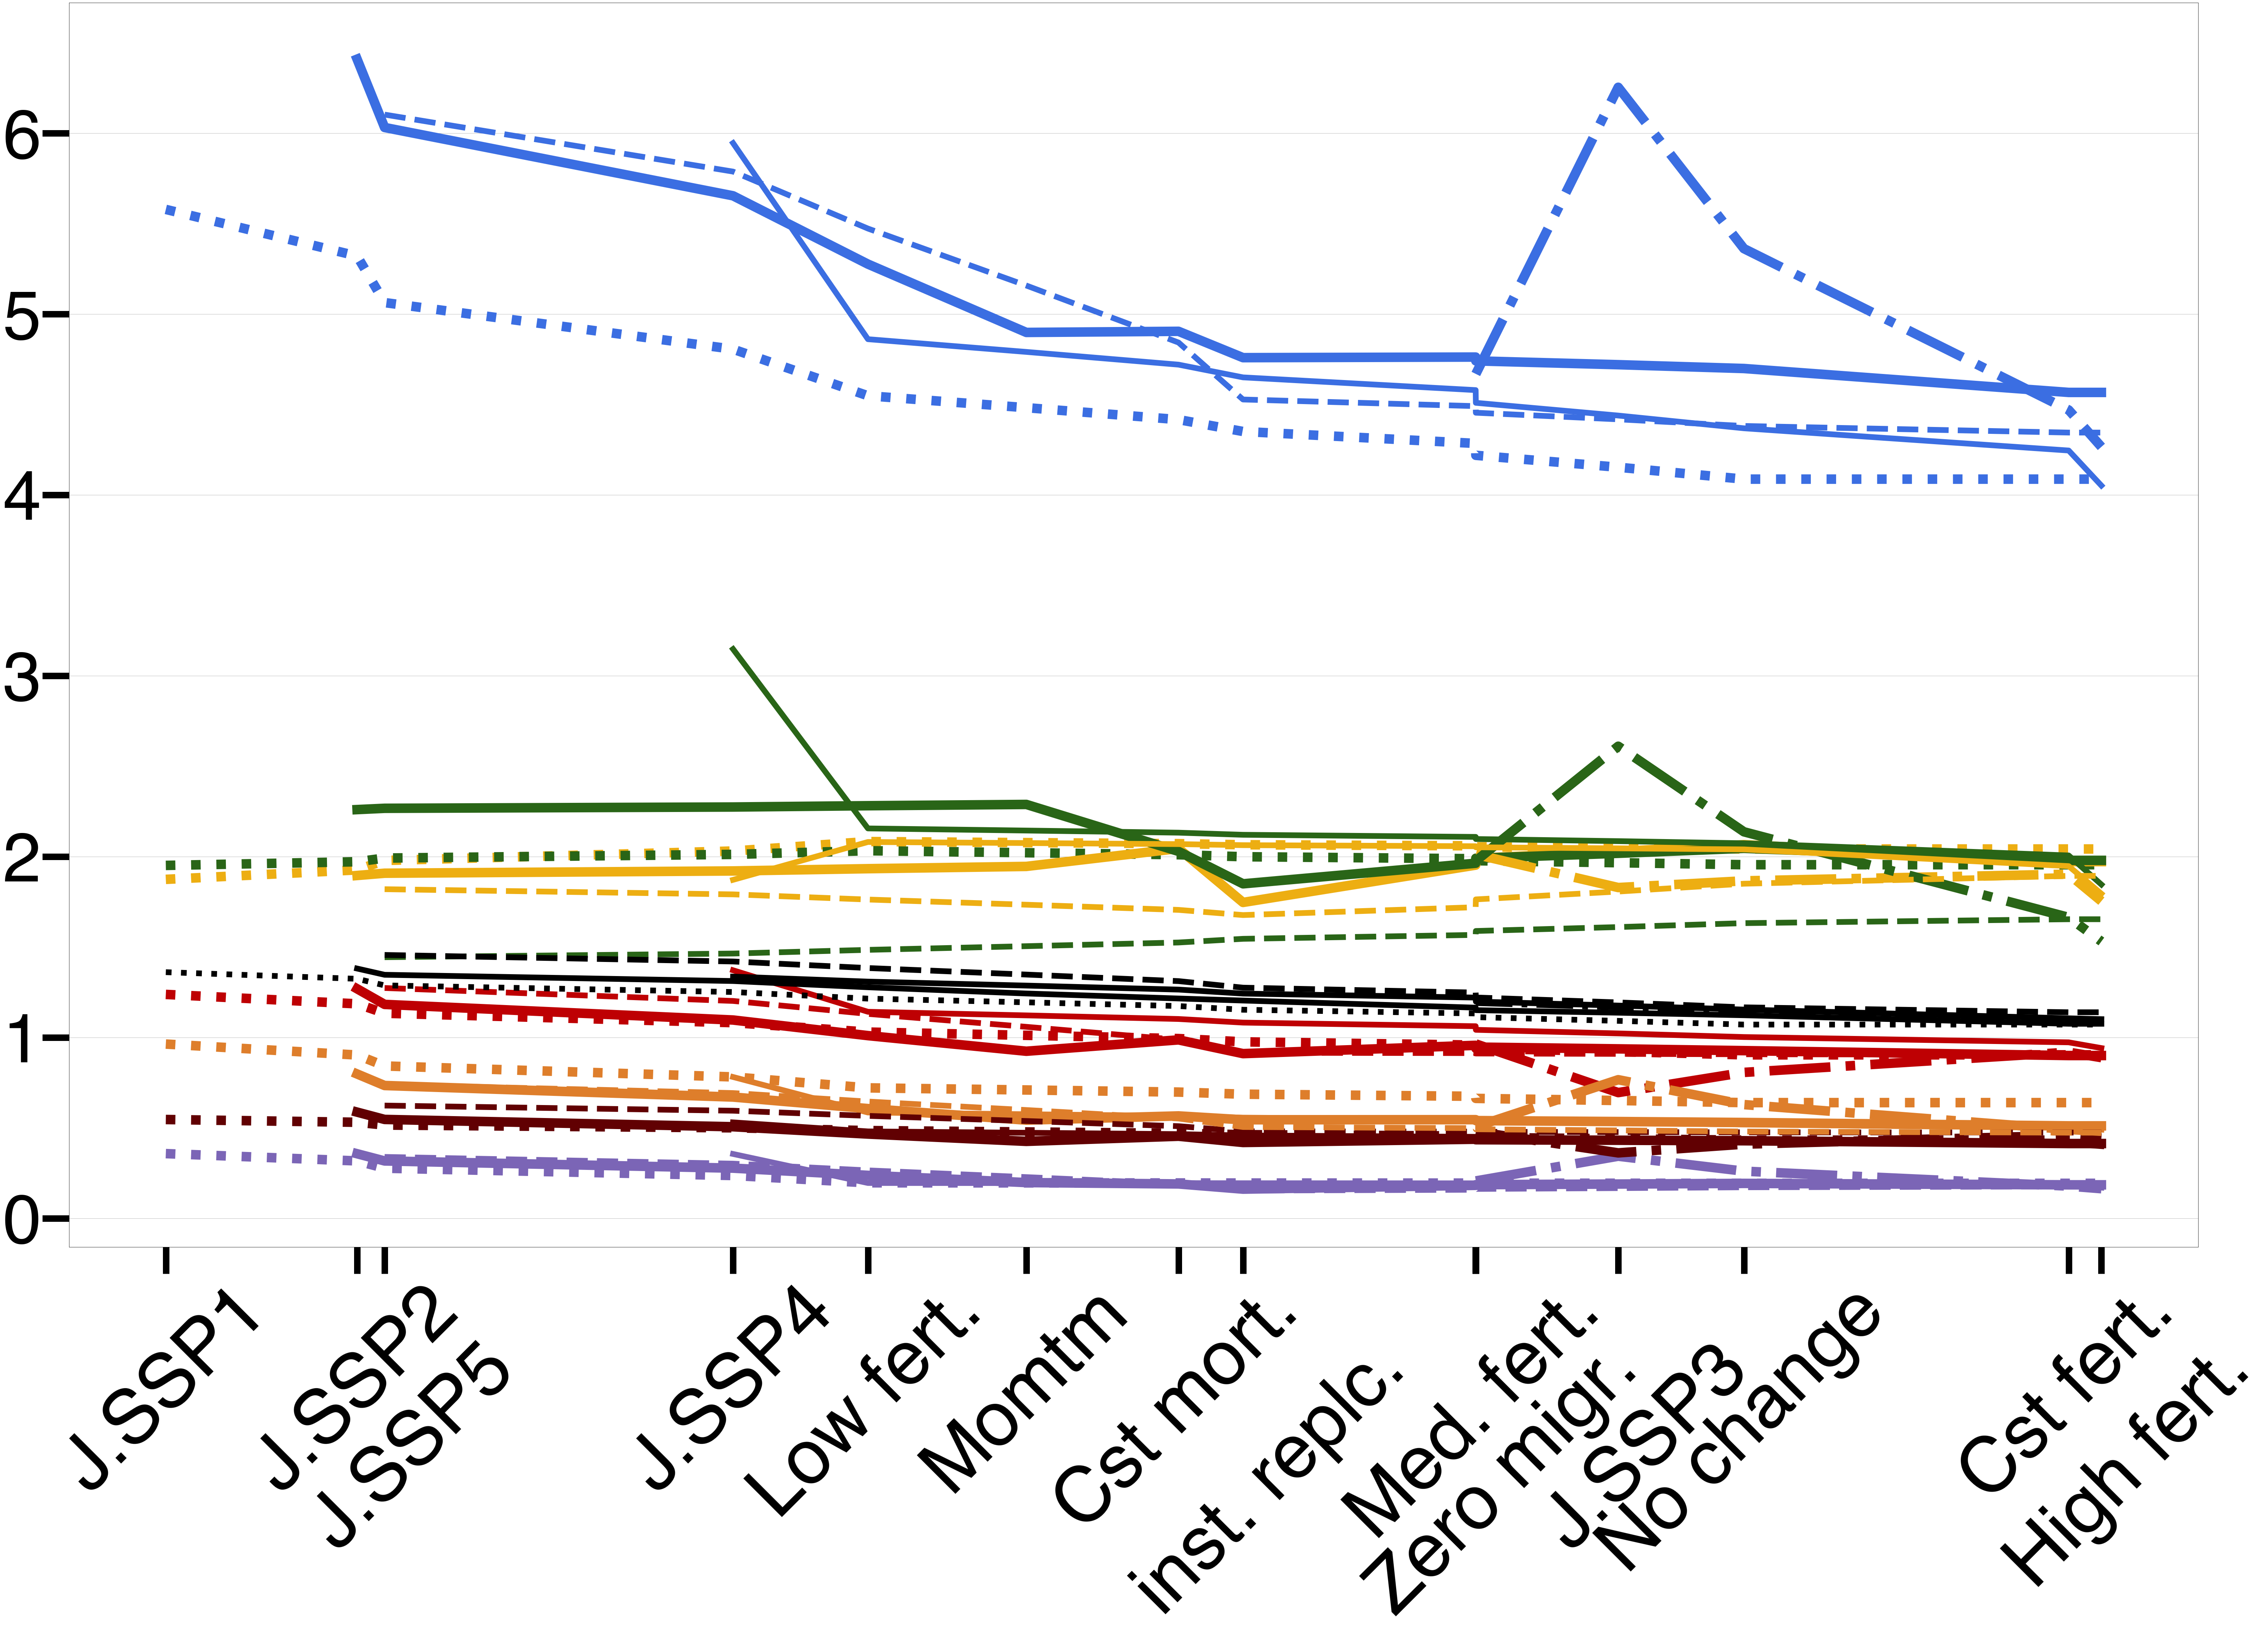

In [656]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

from matplotlib.pyplot import gca

plt.figure(figsize=[100,60])

ticks = [var + '\n (%.2f'%(pop/1e+09)+')' for (var, pop) in zip(list(df_plot.category), df_plot.index.to_list())]

ticks = ['J.SSP1',
         'J.SSP2',
         '\nJ.SSP5',
         'J.SSP4',
         'Low fert.',
         'Momtm',
         'Cst mort.',
         '\ninst. replc.',
         'Med. fert.',
         '\nZero migr.',
         '\nJ.SSP3',
         'No change',
         'Cst fert.',
         '\nHigh fert.']

# ticks = ['(7.95) Jones SSP1',
#          '\n(8.21) Jones SSP2 ',
#          '\n\n(8.25) Jones SSP5 ',
#          '(8.72) Jones SSP4',
#          '\n(8.91) Low fertility',
#          '\n\n(9.12) Momentum',
#          '(9.33) Constant mortality',
#          '\n(9.42) Instant replacement',
#          '\n\n(9.73) Medium fertility',
#          '\n\n\n(9.74) Zero migration ',
#          '(9.93) Jones SSP3',
#          '\n(10.10) No change',
#          '(10.54) Constant fertility',
#          '\n(10.59) High fertility']

colors = [     
            '#EDAE12',
            '#3B6EE2',
            '#7B65B6',
            '#296517',
            '#610002',
            '#BE0003',
            '#DE7E2B',
         ]

dashes = [
            ':',
            '-',
            '-.',
            '-',
            '--'
         ]

linewidth = 25.

for i, col in enumerate(df_plot.columns[:-1]):
    x = np.array(df_plot.index)
    y = np.array(df_plot[col])
    if i<35:
        c = colors[i%7]
        dashing = dashes[int(i/7)]
    else:
        c = 'black'
        dashing = dashes[(i-35)%5]
    
    if int(i/7) == 3 or i==38:
        linewidth = 15.
    
    plt.xticks(x, ticks, fontsize=200, rotation=45)
#     plt.xlabel('\n Population projection (Billions)', fontsize=120)
    plt.yticks(fontsize=180)
#     plt.ylabel('Number of Countries', fontsize=120)
    plt.plot(x, y, color=c, linewidth=linewidth, linestyle=dashing)
    plt.grid(b=True, axis='y', which='major')


ax = plt.gca()
ax.tick_params(width=17, length=70, color='black')
plt.show()

In [423]:
['Most vulnerable (India)', 'Newly vulnerable (Mexico)', 'Exporters (Argentina)', 'Importers (Singapore)',
             'Vulnerable but improving (Morocco)', 'Decreasing but not as vulnerable (Italy)', 'Highly variable',  'Increasing sufficiency (Norway)', 
 'Global caloric sufficiency']

['Exporters',
 'Increasing sufficiency',
 'Importers',
 'Most vulnerable',
 'Newly vulnerable',
 'Vulnerable but improving',
 'Decreasing but not as vulnerable',
 'Highly variable',
 'Outliers']

In [321]:
np.array(df_plot.index)

array([ 7949926714,  8210591474,  8248102437,  8722972624,  8906797000,
        9122680000,  9330050000,  9417980000,  9735034000,  9735283000,
        9929316985, 10100631000, 10543230000, 10587774000])

In [377]:
df_plot['category']

values
7949926714           Baseline SSP1
8210591474           Baseline SSP2
8248102437           Baseline SSP5
8722972624           Baseline SSP4
8906797000                     Low
9122680000                Momentum
9330050000      Constant mortality
9417980000     Instant replacement
9735034000                  Medium
9735283000          Zero migration
9929316985           Baseline SSP3
10100631000              No change
10543230000     Constant fertility
10587774000                   High
Name: category, dtype: object

In [443]:
all_counts

[                                                                               ISO3
 category                                                                           
 Decreasing but not as vulnerable  [AUT, AZE, CHL, CZE, DEU, ESP, IRL, KGZ, LAO, ...
 Exporters                         [ARG, AUS, BGR, BLZ, BRA, CAN, DNK, FRA, HUN, ...
 Highly variable                   [CAF, CUB, GAB, GRC, GUY, HRV, IRN, ITA, LBR, ...
 Importers                         [ARE, BEL, BRN, CYP, DJI, DZA, GMB, IRQ, ISR, ...
 Increasing sufficiency            [ALB, ARM, BIH, BLR, BTN, BWA, EST, FIN, GEO, ...
 Most vulnerable                   [AFG, AGO, BDI, BGD, CMR, COD, COG, DOM, ECU, ...
 Newly vulnerable                  [BEN, BFA, BOL, CHE, CHN, CIV, COL, CRI, GBR, ...
 Vulnerable but improving                                                 [ERI, LSO],
                                                                                ISO3
 category                                                       

In [447]:
suffices[0]

,ISO3,calSuff2000,ssp1,ssp2,ssp3,ssp4,ssp5,delta_consistency,trade,name,avg_new_suff,delta_CalSuff_avg,delta_max,lowest_ssp,highest_ssp,category
0,AFG,0.785233,0.320812,0.344120,0.367202,0.345124,0.410172,0,0.269311,Afghanistan,0.357486,-0.427747,-0.464421,0.320812,0.410172,Most vulnerable
1,AGO,0.597733,0.182104,0.235490,0.168509,0.270676,0.255566,0,0.221301,Angola,0.222469,-0.375264,-0.429224,0.168509,0.270676,Most vulnerable
2,ALB,2.319538,2.708123,2.669939,2.525421,2.723937,2.743671,4,0.208123,Albania,2.674218,0.354680,0.424133,2.525421,2.743671,Increasing sufficiency
3,ARE,0.403014,0.257891,0.248495,0.233187,0.292094,0.221543,0,0.000000,United Arab Emirates,0.250642,-0.152372,-0.181470,0.221543,0.292094,Importers
4,ARG,8.343864,4.548369,5.229174,5.117946,4.861318,4.974899,0,1.000000,Argentina,4.946341,-3.397523,-3.795496,4.548369,5.229174,Exporters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,VNM,1.306412,0.800220,0.871953,0.877263,0.810057,0.871068,0,0.590617,Vietnam,0.846112,-0.460300,-0.506192,0.800220,0.877263,Newly vulnerable
156,YEM,0.273570,0.154453,0.146401,0.231249,0.165281,0.152722,1,0.041852,Yemen,0.170021,-0.103549,-0.127170,0.146401,0.231249,Importers
157,ZAF,1.681635,1.083297,1.147392,3.098045,1.063386,1.409564,1,0.433191,South Africa,1.560337,-0.121298,1.416410,1.063386,3.098045,Highly variable
158,ZMB,2.483866,0.712071,0.788991,1.655368,1.047013,0.886943,0,0.577964,Zambia,1.018077,-1.465789,-1.771795,0.712071,1.655368,Newly vulnerable


In [540]:
['Exporters', 'Increasing sufficiency', 'Importers', 'Most vulnerable', 'Newly vulnerable', 
             'Vulnerable but improving', 'Decreasing but not as vulnerable', 'Highly variable', 'Outliers']


l1 = all_counts[9]['ISO3']['Newly vulnerable']# + all_counts[0]['ISO3']['Vulnerable but improving']
l2 = all_counts[4]['ISO3']['Decreasing but not as vulnerable']# + all_counts[8]['ISO3']['Vulnerable but improving']

len([l for l in l2 if l in l1]), [l for l in l2 if l in l1]
len(l2)

28

In [457]:
len(drop_list) - np.sum(drop_list)

119

In [475]:
suffices[0][['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']]<1

,ssp1,ssp2,ssp3,ssp4,ssp5
0,True,True,True,True,True
1,True,True,True,True,True
2,False,False,False,False,False
3,True,True,True,True,True
4,False,False,False,False,False
...,...,...,...,...,...
155,True,True,True,True,True
156,True,True,True,True,True
157,False,False,False,False,False
158,True,True,False,False,True


In [505]:
below_jones = []
below_high = []

jones = suffices[4].set_index('ISO3')[['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']]<1
high = suffices[9].set_index('ISO3')[['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']]<1

for idx in jones.index:
    if jones.loc[idx, :].sum()>=3:
        below_jones.append(idx)
    if high.loc[idx, :].sum()>=3:
        below_high.append(idx)